#### Step 1: Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image
import os
from IPython.display import display
from PIL import Image as PILImage

#### Step 2: First stage of rCNN

Saved grid image: grid_0_0.jpg
Saved grid image: grid_0_1.jpg
Saved grid image: grid_1_0.jpg
Saved grid image: grid_1_1.jpg
Saved grid image: grid_2_0.jpg
Saved grid image: grid_2_2.jpg


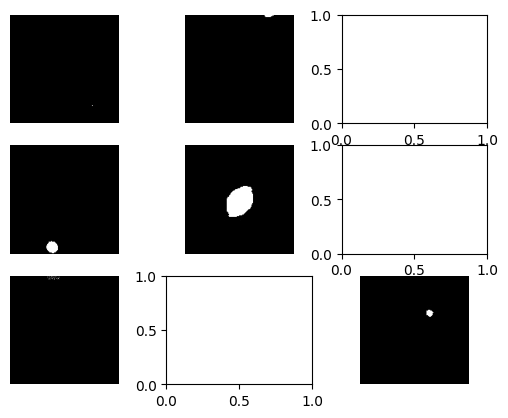

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("001.jpg", cv2.IMREAD_COLOR)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Determine the grid size (in this case, 3x3 grids)
grid_size = 3

# Calculate the dimensions of each grid
grid_height = img_gray.shape[0] // grid_size
grid_width = img_gray.shape[1] // grid_size

# Create a subplot for displaying the images
fig, axs = plt.subplots(grid_size, grid_size)

# Iterate over rows and columns to extract each grid
for i in range(grid_size):
    for j in range(grid_size):
        y_start = i * grid_height
        y_end = (i + 1) * grid_height
        x_start = j * grid_width
        x_end = (j + 1) * grid_width
        grid = img_gray[y_start:y_end, x_start:x_end]

        if np.any(grid < 255) and np.any(grid > 0):
            # Save the individual grid image if it contains black and white pixels
            grid_filename = f"grid_{i}_{j}.jpg"
            cv2.imwrite(grid_filename, grid)
            print(f"Saved grid image: {grid_filename}")
            
            # Display the grid image
            axs[i, j].imshow(grid, cmap='gray')
            axs[i, j].axis('off')

# Show the grid images
plt.show()


#### Step 3: Recursive CNN 3

In [ ]:
import cv2
import numpy as np

# Load the original image
img = cv2.imread("004.jpg", cv2.IMREAD_COLOR)

# Initialize a flag to check if there's white in the corners
white_in_corners = False

# Define the corner pixels
corner_pixels = [(0, 0), (img.shape[0] - 1, img.shape[1] - 1)]

highest_white_pixel_count = 0
best_grid = None
iteration = 0
all_white_grid = False

while not white_in_corners:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Determine the grid size (in this case, 3x3 grids)
    grid_size = 3

    # Calculate the dimensions of each grid
    grid_height = img_gray.shape[0] // grid_size
    grid_width = img_gray.shape[1] // grid_size

    # Flag to check if there's white in the current iteration
    white_in_iteration = False

    # Iterate over rows and columns to extract each grid
    for i in range(grid_size):
        for j in range(grid_size):
            y_start = i * grid_height
            y_end = (i + 1) * grid_height
            x_start = j * grid_width
            x_end = (j + 1) * grid_width
            grid = img_gray[y_start:y_end, x_start:x_end]

            # Count the white pixels in the grid
            white_pixel_count = np.sum(grid == 255)

            if white_pixel_count > highest_white_pixel_count:
                highest_white_pixel_count = white_pixel_count
                best_grid = grid

            # Check if the grid is all white
            if white_pixel_count == grid_height * grid_width:
                all_white_grid = True

    if all_white_grid:
        if iteration == 0:
            # In the first iteration, save the original image before gridding
            cv2.imwrite("original_image.jpg", img)
            print("Saved the original image before gridding.")
        break  # Terminate if all grids contain white pixels

    # Save the grid with the highest white pixel count
    if best_grid is not None:
        cv2.imwrite(f"best_grid_iteration_{iteration}.jpg", best_grid)
        print(f"Saved the grid with the highest white pixel count in iteration {iteration}.")
        best_grid = None  # Reset the best grid

    # If white found in this iteration, set white_in_corners to True
    if any(img_gray[y, x] == 255 for y, x in corner_pixels):
        white_in_corners = True

    # Increment the iteration count
    iteration += 1

# Final message
print("White pixel found in the corners.")


Saved the grid with the highest white pixel count in iteration 0.


In [ ]:
Image